In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import datetime
import numpy as np

In [2]:
UNIT = '1'
MARKET = 'KRW-BTC'

data_columns = {
    'market': 'Market',
    'candle_date_time_utc': 'Date',
    'opening_price': 'Open',
    'high_price': 'High',
    'low_price': 'Low',
    'trade_price': 'Close',
    'candle_acc_trade_volume': 'Volume',
    'candle_acc_trade_price' : 'Price',
}

# str UTC DATETIME
def get_query_datetime():
    now = datetime.datetime.now() #- datetime.timedelta(hours=9)
    now = str(now.strftime('%Y-%m-%d %H:%M:%S'))
    now = now.replace(' ', 'T') + 'Z'
    return now


# 크롤링한 데이터 전처리
def preprocessing_crawled_data(datas: str):
    array_dict_datas = []
    array_datas = datas.split('},')

    for data in array_datas:
        array_data = []
        data = data.replace('{', '')
        data = data.replace('}', '')
        array_data = data.split(',')

        dict_data = {}
        for value in array_data:
            tmp = value.split(':', 1)
            if tmp[0][1: -1] in data_columns:
                dict_data[data_columns[tmp[0][1: -1]]] = tmp[1]

        dict_data['Market'] = dict_data['Market'][1: -1]
        dict_data['Date'] = dict_data['Date'][1: -1]
        dict_data['Open'] = float(dict_data['Open'])
        dict_data['High'] = float(dict_data['High'])
        dict_data['Low'] = float(dict_data['Low'])
        dict_data['Close'] = float(dict_data['Close'])
        dict_data['Volume'] = float(dict_data['Volume'])
        dict_data['Price'] = float(dict_data['Price'])
        array_dict_datas.append(dict_data)

    return array_dict_datas


# 크롤링 후 df 리턴
def do_crawl(unit: str, market: str, time: str, count: str, loop: int):
    df = pd.DataFrame([], columns=['Date', 'Market', 'Open', 'High', 'Low', 'Close', 'Volume', 'Price'])
    url = "https://api.upbit.com/v1/candles/minutes/" + unit

    for _ in range(loop):
        querystring = {"market": market, "to": time, "count": count}
        response = requests.request("GET", url, params=querystring)
        df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
        time = df.iloc[-1]['Date'] + 'Z'
    df = df.loc[::-1].reset_index(drop=True)
    return df




# first 데이터 셋 만들기
df = do_crawl(UNIT, MARKET, get_query_datetime(), '200', 50)
df.to_csv("test.csv")

print(df)

C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pand

C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pand

                     Date   Market        Open        High         Low  \
0     2022-10-31T08:34:00  KRW-BTC  28765000.0  28765000.0  28746000.0   
1     2022-10-31T08:35:00  KRW-BTC  28756000.0  28765000.0  28753000.0   
2     2022-10-31T08:36:00  KRW-BTC  28764000.0  28764000.0  28753000.0   
3     2022-10-31T08:37:00  KRW-BTC  28755000.0  28765000.0  28740000.0   
4     2022-10-31T08:38:00  KRW-BTC  28765000.0  28766000.0  28740000.0   
...                   ...      ...         ...         ...         ...   
9995  2022-11-07T07:13:00  KRW-BTC  29229000.0  29261000.0  29229000.0   
9996  2022-11-07T07:14:00  KRW-BTC  29237000.0  29260000.0  29233000.0   
9997  2022-11-07T07:15:00  KRW-BTC  29235000.0  29256000.0  29229000.0   
9998  2022-11-07T07:16:00  KRW-BTC  29230000.0  29230000.0  29220000.0   
9999  2022-11-07T07:17:00  KRW-BTC  29222000.0  29229000.0  29219000.0   

           Close    Volume            Price  
0     28756000.0  3.537974  101723958.15839  
1     28764000.0   

Text(0, 0.5, 'price')

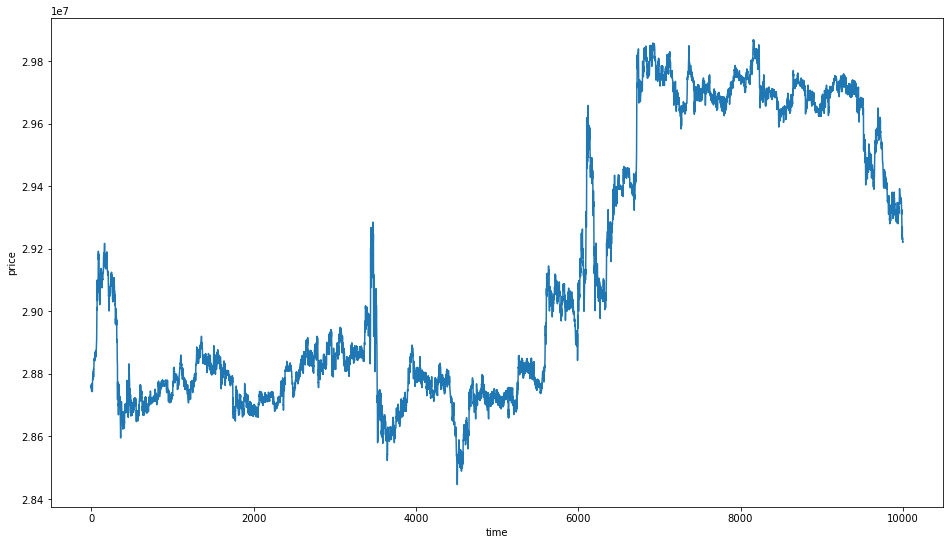

In [3]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['Close'], x=df.index)
plt.xlabel('time')
plt.ylabel('price')

In [4]:
scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price']
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])

df = pd.DataFrame(scaled, columns=scale_cols)
print(df)

          Open      High       Low     Close    Volume     Price
0     0.224877  0.213523  0.212781  0.218003  0.034275  0.033383
1     0.218552  0.213523  0.217697  0.223629  0.014369  0.013996
2     0.224174  0.212811  0.217697  0.217300  0.007099  0.006917
3     0.217850  0.213523  0.208567  0.224332  0.026504  0.025811
4     0.224877  0.214235  0.208567  0.211674  0.011570  0.011270
...        ...       ...       ...       ...       ...       ...
9995  0.550949  0.566548  0.551966  0.554852  0.043428  0.043021
9996  0.556571  0.565836  0.554775  0.554852  0.043696  0.043276
9997  0.555165  0.562989  0.551966  0.550633  0.054148  0.053623
9998  0.551651  0.544484  0.545646  0.544304  0.087762  0.086881
9999  0.546030  0.543772  0.544944  0.545710  0.017444  0.017269

[10000 rows x 6 columns]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.1, random_state=0, shuffle=False)
x_train.shape, y_train.shape
print(type(x_test))
print(x_test)

<class 'pandas.core.frame.DataFrame'>
          Open      High       Low    Volume     Price
9000  0.860155  0.857651  0.850421  0.036320  0.036502
9001  0.860155  0.857651  0.860955  0.029004  0.029150
9002  0.860155  0.858363  0.860955  0.025143  0.025271
9003  0.861560  0.863345  0.862360  0.026280  0.026416
9004  0.866479  0.867616  0.863062  0.024010  0.024137
...        ...       ...       ...       ...       ...
9995  0.550949  0.566548  0.551966  0.043428  0.043021
9996  0.556571  0.565836  0.554775  0.043696  0.043276
9997  0.555165  0.562989  0.551966  0.054148  0.053623
9998  0.551651  0.544484  0.545646  0.087762  0.086881
9999  0.546030  0.543772  0.544944  0.017444  0.017269

[1000 rows x 5 columns]


C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\3903757176.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.1, random_state=0, shuffle=False)


In [6]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):
    # X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))
    # y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [7]:
WINDOW_SIZE=5
BATCH_SIZE=32

In [8]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [9]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 5]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [10]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=35)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)
                             
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/100
    271/Unknown - 6s 5ms/step - loss: 0.0029 - mse: 0.0059
Epoch 1: val_loss improved from inf to 0.00018, saving model to tmp\ckeckpointer.ckpt
282/282 [==============================] - 7s 9ms/step - loss: 0.0028 - mse: 0.0057 - val_loss: 1.7864e-04 - val_mse: 3.5729e-04
Epoch 2/100
273/282 [============================>.] - ETA: 0s - loss: 1.4501e-04 - mse: 2.9002e-04
Epoch 2: val_loss improved from 0.00018 to 0.00012, saving model to tmp\ckeckpointer.ckpt
282/282 [==============================] - 2s 5ms/step - loss: 1.4406e-04 - mse: 2.8812e-04 - val_loss: 1.2325e-04 - val_mse: 2.4651e-04
Epoch 3/100
278/282 [============================>.] - ETA: 0s - loss: 1.3837e-04 - mse: 2.7674e-04
Epoch 3: val_loss did not improve from 0.00012
282/282 [==============================] - 1s 5ms/step - loss: 1.3776e-04 - mse: 2.7551e-04 - val_loss: 1.3707e-04 - val_mse: 2.7414e-04
Epoch 4/100
281/282 [============================>.] - ETA: 0s - loss: 1.3403e-04 - mse: 2.6807e-04
Epo

282/282 [==============================] - 2s 5ms/step - loss: 9.1681e-05 - mse: 1.8336e-04 - val_loss: 1.2942e-04 - val_mse: 2.5884e-04
Epoch 29/100
279/282 [============================>.] - ETA: 0s - loss: 9.3163e-05 - mse: 1.8633e-04
Epoch 29: val_loss did not improve from 0.00008
282/282 [==============================] - 1s 5ms/step - loss: 9.2837e-05 - mse: 1.8567e-04 - val_loss: 9.9652e-05 - val_mse: 1.9930e-04
Epoch 30/100
271/282 [===========================>..] - ETA: 0s - loss: 9.3877e-05 - mse: 1.8775e-04
Epoch 30: val_loss did not improve from 0.00008
282/282 [==============================] - 2s 5ms/step - loss: 9.2134e-05 - mse: 1.8427e-04 - val_loss: 9.2799e-05 - val_mse: 1.8560e-04
Epoch 31/100
271/282 [===========================>..] - ETA: 0s - loss: 9.3763e-05 - mse: 1.8753e-04
Epoch 31: val_loss did not improve from 0.00008
282/282 [==============================] - 2s 5ms/step - loss: 9.2189e-05 - mse: 1.8438e-04 - val_loss: 1.8671e-04 - val_mse: 3.7341e-04
Epoch

282/282 [==============================] - 1s 5ms/step - loss: 8.2889e-05 - mse: 1.6578e-04 - val_loss: 7.8025e-05 - val_mse: 1.5605e-04
Epoch 57/100
272/282 [===========================>..] - ETA: 0s - loss: 7.9687e-05 - mse: 1.5937e-04
Epoch 57: val_loss did not improve from 0.00007
282/282 [==============================] - 1s 5ms/step - loss: 8.0450e-05 - mse: 1.6090e-04 - val_loss: 1.4751e-04 - val_mse: 2.9502e-04
Epoch 58/100
273/282 [============================>.] - ETA: 0s - loss: 8.4073e-05 - mse: 1.6815e-04
Epoch 58: val_loss did not improve from 0.00007
282/282 [==============================] - 1s 5ms/step - loss: 8.4730e-05 - mse: 1.6946e-04 - val_loss: 9.5830e-05 - val_mse: 1.9166e-04
Epoch 59/100
277/282 [============================>.] - ETA: 0s - loss: 8.2742e-05 - mse: 1.6548e-04
Epoch 59: val_loss did not improve from 0.00007
282/282 [==============================] - 1s 5ms/step - loss: 8.2355e-05 - mse: 1.6471e-04 - val_loss: 9.2694e-05 - val_mse: 1.8539e-04
Epoch

Epoch 85/100
277/282 [============================>.] - ETA: 0s - loss: 7.7368e-05 - mse: 1.5474e-04
Epoch 85: val_loss did not improve from 0.00007
282/282 [==============================] - 2s 5ms/step - loss: 7.7688e-05 - mse: 1.5538e-04 - val_loss: 1.1598e-04 - val_mse: 2.3197e-04
Epoch 86/100
277/282 [============================>.] - ETA: 0s - loss: 7.7709e-05 - mse: 1.5542e-04
Epoch 86: val_loss did not improve from 0.00007
282/282 [==============================] - 1s 5ms/step - loss: 7.7321e-05 - mse: 1.5464e-04 - val_loss: 1.4485e-04 - val_mse: 2.8969e-04
Epoch 87/100
277/282 [============================>.] - ETA: 0s - loss: 8.1581e-05 - mse: 1.6316e-04
Epoch 87: val_loss did not improve from 0.00007
282/282 [==============================] - 1s 5ms/step - loss: 8.1182e-05 - mse: 1.6236e-04 - val_loss: 6.9666e-05 - val_mse: 1.3933e-04
Epoch 88/100
273/282 [============================>.] - ETA: 0s - loss: 7.9961e-05 - mse: 1.5992e-04
Epoch 88: val_loss did not improve from 0

In [11]:
print("%.7f" % (float(min(history.history['val_loss']))))
model.load_weights(filename)
pred = model.predict(test_data)
actual = np.asarray(y_test)[WINDOW_SIZE:]
actual = np.reshape(actual, (len(actual), 1))
print(pred.shape)
print(actual.shape)

0.0000668
32/32 [==============================] - 1s 3ms/step
(995, 1)
(995, 1)


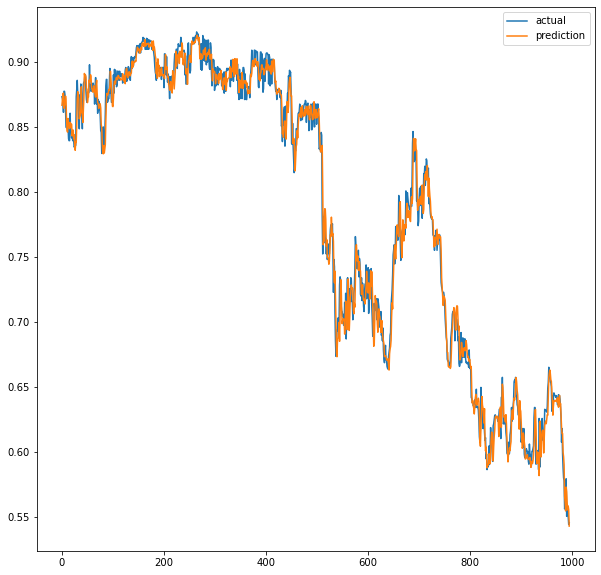

In [12]:
plt.figure(figsize=(10,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [13]:
live_df = do_crawl(UNIT, MARKET, get_query_datetime(), '200', 5)
print(datetime.datetime.now())
print(get_query_datetime())

scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price']
scaled = scaler.fit_transform(live_df[scale_cols])
live_scaled_df = pd.DataFrame(scaled, columns=scale_cols)
live_x, live_y = live_scaled_df.drop('Close', 1), live_scaled_df['Close']
live_data = windowed_dataset(live_x, live_y, WINDOW_SIZE, BATCH_SIZE, False)

pred = model.predict(live_data)

# create empty table with 12 fields
trainPredict_dataset_like = np.zeros(shape=(len(pred), 6) )
# put the predicted values in the right field
trainPredict_dataset_like[:,0] = pred[:,0]
# inverse transform and then select the right field
pred = scaler.inverse_transform(trainPredict_dataset_like)[:,0]

def muzisung_buy(pred_percent: float, live_percent: float, money: float):
    global array_pred_percents
    array_pred_percents.sort()
    if pred_percent > np.mean(array_pred_percents):
        money = money + (money * live_percent / 100)
    return money

C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pand

2022-11-07 16:20:04.927348
2022-11-07T16:20:04Z
32/32 [==============================] - 0s 3ms/step


C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\1060144033.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(preprocessing_crawled_data(response.text[1:-1]), ignore_index=True)
C:\Users\KMH\AppData\Local\Temp\ipykernel_20728\3278830557.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  live_x, live_y = live_scaled_df.drop('Close', 1), live_scaled_df['Close']


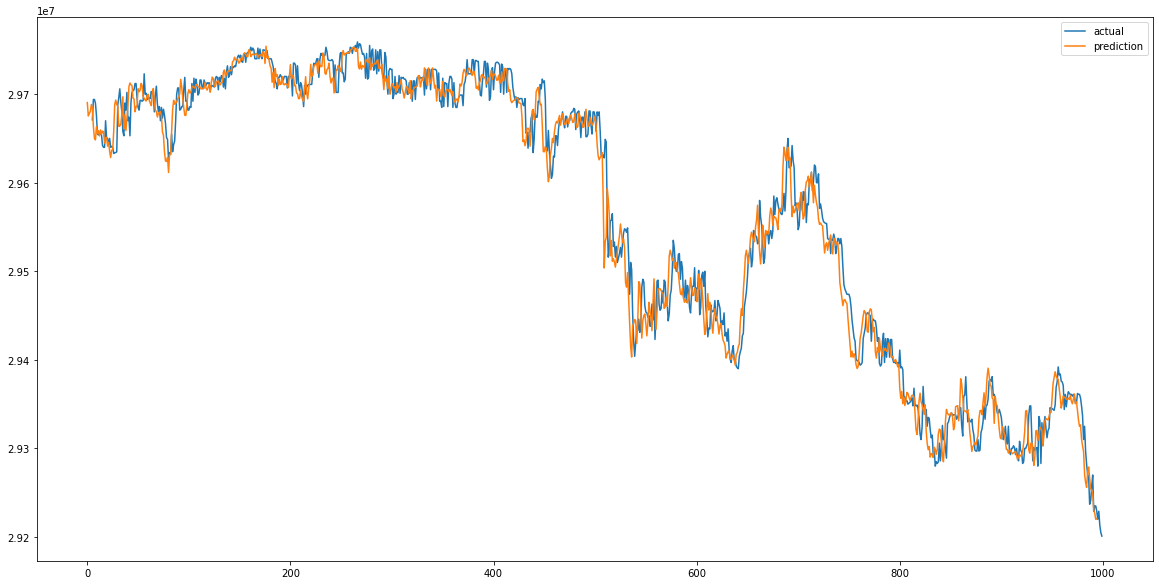

In [14]:
plt.figure(figsize=(20,10))
plt.plot(live_df['Close'][WINDOW_SIZE:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()